## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
import pandas as pd
from sklearn import preprocessing

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0, 19).round(2)
y = np.array([-1*x+2 for x in X]).round(2)

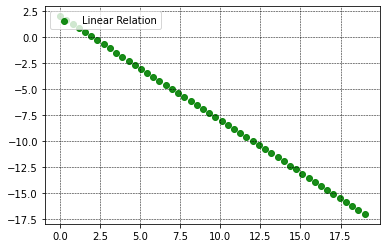

In [ ]:
plt.scatter(X,y,s=None, marker='o',color='g',edgecolors='g',alpha=0.9,label="Linear Relation")
plt.grid(color='black', linestyle='--', linewidth=0.5,markevery=int)
plt.legend(loc=2)
#plt.axis('scaled')
 
plt.show()

In [ ]:
LEARNING_RATE=0.1
EPSILON=1e-8
ITERATIONS=200
BETA=.9 

In [ ]:
def predict(X, theta_0, theta_1):
  y_predicted = [(theta_0 + theta_1*point) for point in X]
  return y_predicted

def plot_loss_epochs(loss, epochs):
  plt.plot(np.arange(epochs), list(loss))
  plt.show()

def plot_regression_line(x, y, h_list):
  for h in h_list :
    plt.scatter(X,y)
    plt.plot(X, h)
    plt.xlabel('x')
    plt.ylabel('y')
  plt.show()

def plot_thetas_loss(thetas_0, thetas_1, loss):
  plt.plot(thetas_0, list(loss))
  plt.xlabel('thetas_0')
  plt.ylabel('loss')
  plt.show()
  plt.plot(thetas_1, list(loss))
  plt.xlabel('thetas_1')
  plt.ylabel('loss')
  plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [ ]:
def adagrad(X, y, iterations, learning_rate, epsilon):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  v_0 = 0
  v_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]

    gradient_1 = (np.sum(theta_1_cost)/array_length)
    gradient_0 = np.sum(distance)/array_length

    v_0 = v_0 + (gradient_0)**2
    theta_0 = theta_0 - ((learning_rate* gradient_0)/(math.sqrt(v_0 )+ epsilon))
    v_1 = v_1 +  (gradient_1)**2
    theta_1 = theta_1 - ((learning_rate* gradient_1)/(math.sqrt(v_1)+ epsilon))

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [ ]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = adagrad(X, y, ITERATIONS, LEARNING_RATE, EPSILON)

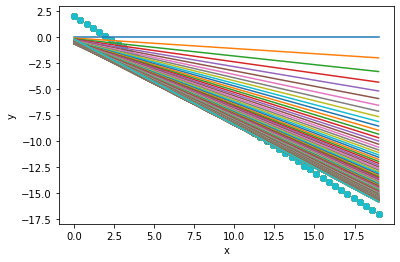

In [ ]:
plot_regression_line(X,y, new_y)

score:  0.9405703864117243 with iterations: 200 and learning rate: 0.1


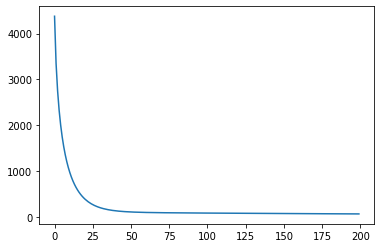

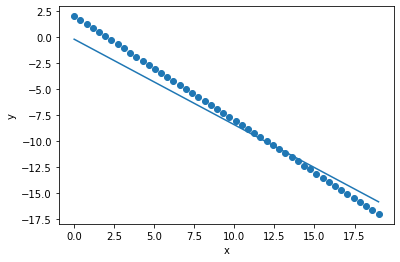

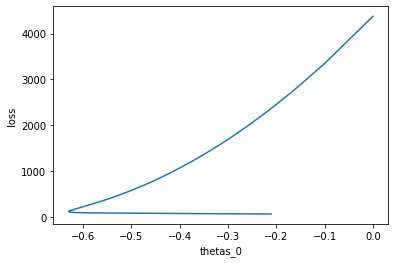

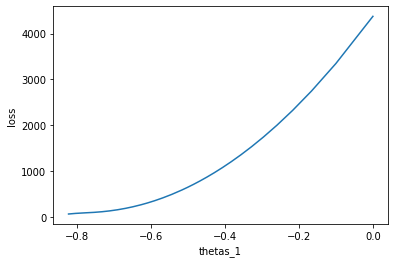

In [ ]:
y_predicted = predict(X, new_theta_0, new_theta_1)
print('score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS} and learning rate: {LEARNING_RATE}')
plot_loss_epochs(loss_list, ITERATIONS)
plot_regression_line(X,y, list([y_predicted]))
plot_thetas_loss(thetas_0, thetas_1, loss_list)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [ ]:
def rms_prob(X, y, iterations, learning_rate, epsilon, beta):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  v_0 = 0
  v_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]

    gradient_0 = np.sum(distance)/array_length
    gradient_1 = (np.sum(theta_1_cost)/array_length)
    
    v_0 = (beta*v_0) + (1-beta)*(gradient_0)**2
    theta_0 = theta_0 - ((learning_rate* gradient_0)/(math.sqrt(v_0) + epsilon))
    
    v_1 = (beta*v_1) +  (1-beta)*(gradient_1)**2
    theta_1 = theta_1 - ((learning_rate* gradient_1)/(math.sqrt(v_1) + epsilon)) 

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [ ]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = rms_prob(X, y, ITERATIONS, LEARNING_RATE, EPSILON, BETA)

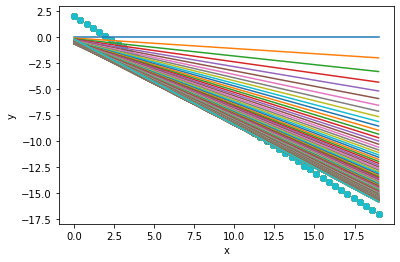

In [ ]:
plot_regression_line(X,y, new_y)

score:  0.9897331474437111 with iterations: 200 and learning rate: 0.1


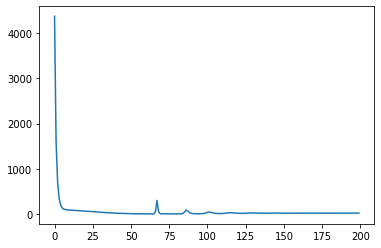

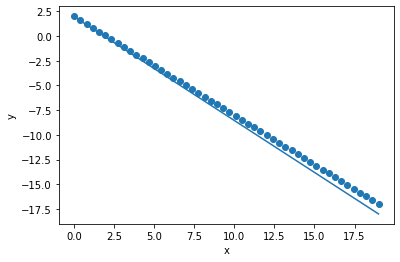

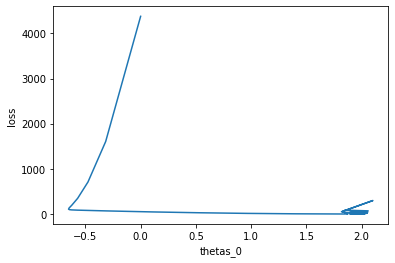

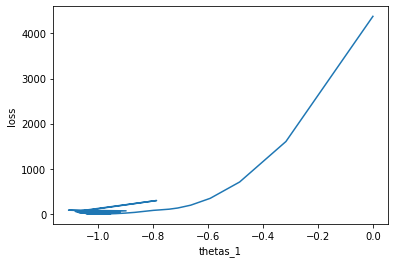

In [ ]:
y_predicted = predict(X, new_theta_0, new_theta_1)
print('score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS} and learning rate: {LEARNING_RATE}')
plot_loss_epochs(loss_list, ITERATIONS)
plot_regression_line(X,y, list([y_predicted]))
plot_thetas_loss(thetas_0, thetas_1, loss_list)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [ ]:
def adam_rectified(X, y, iterations, learning_rate, epsilon, rms_beta, momentum_beta):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0=0
  theta_1=0
  rms_v_0=0
  rms_v_1=0
  momentum_v0=0
  momentum_v1=0

  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]

    gradient_0 = np.sum(distance)/array_length
    gradient_1 = (np.sum(theta_1_cost)/array_length)
    
    rms_v_0 = (rms_beta*rms_v_0) + (1-rms_beta)*(gradient_0)**2
    momentum_v0 = (momentum_beta * momentum_v0) + ((1-momentum_beta) * gradient_0)
    rms_v_0_hat = rms_v_0 / (1 - (rms_beta**(i+1)))
    momentum_v_0_hat = momentum_v0 / (1 - (momentum_beta**(i+1)))
    
    rms_v_1 = (rms_beta*rms_v_1) +  (1-rms_beta)*(gradient_1)**2
    momentum_v1 = (momentum_beta * momentum_v1) + ((1 - momentum_beta) * gradient_1)
    rms_v_1_hat = rms_v_1 / (1 - (rms_beta**(i+1)))
    momentum_v_1_hat = momentum_v1 / (1 - (momentum_beta**(i+1)))

    theta_0 = theta_0 - ((learning_rate* momentum_v_0_hat)/(math.sqrt(rms_v_0_hat) + epsilon))
    theta_1 = theta_1 - ((learning_rate* momentum_v_1_hat)/(math.sqrt(rms_v_1_hat) + epsilon))

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [ ]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = adam_rectified(X, y, ITERATIONS, LEARNING_RATE, EPSILON, .999, .9)

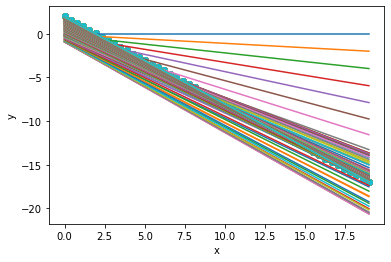

In [ ]:
plot_regression_line(X,y, new_y)

In [ ]:
y_predicted = predict(X, new_theta_0, new_theta_1)
print('score: ',r2_score(y_predicted, y), f'with iterations: {ITERATIONS} and learning rate: {LEARNING_RATE}')

score:  0.9999144773169657 with iterations: 200 and learning rate: 0.1


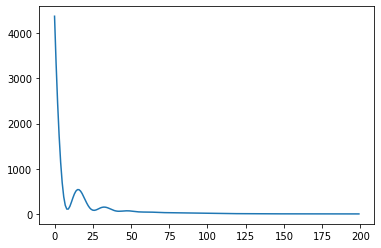

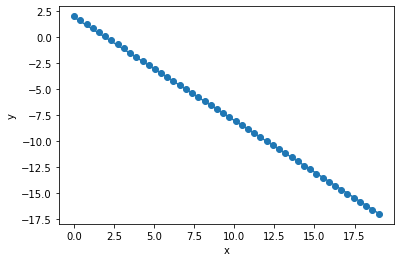

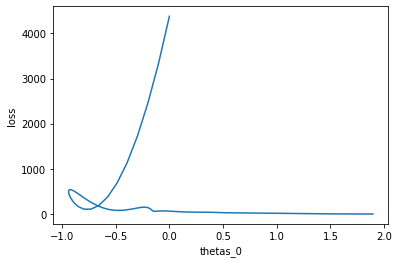

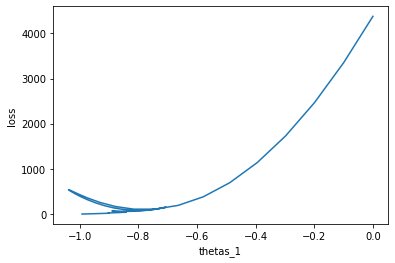

In [ ]:
plot_loss_epochs(loss_list, ITERATIONS)
plot_regression_line(X,y, list([y_predicted]))
plot_thetas_loss(thetas_0, thetas_1, loss_list)